Last edit: June 5th, 2018

# Triangular lattice

<div style="text-align: right;">
<font size="4">Editor: Ryuta Yamamoto</font>
</div>

### Load python modules for calculation of trap frequency

In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
from scipy.special import j1

# Mathmatics calculation
from sympy import *
from sympy.plotting import plot, plot3d
init_printing()

### Fucntions

In [90]:
def Norm_vector(v):
    return sqrt((transpose(v) * v)[0])

def Cross_vector(v1, v2):
    return Matrix([v1[1]*v2[2]-v1[2]*v2[1], v1[2]*v2[0]-v1[0]*v2[2], v1[0]*v2[1]-v1[1]*v2[0]])

def PSF_calc(r, alpha):
    I = (2 * j1(alpha * r) / (alpha * r))**2
    
    try:    
        I[r==0] = 1
    except:
        I = I
        
    return I

### Symbols for sympy calculation

Wavenumbers of horizontal lattice $\boldsymbol{k}^i$ are defined by
\begin{eqnarray*}
\boldsymbol{k} = 
\begin{pmatrix}
\boldsymbol{k}^1 & \boldsymbol{k}^2 & \boldsymbol{k}^3 \\
\end{pmatrix}
= k \times \begin{pmatrix}
1 & \cos\theta & \cos\theta \\
0 & \sin\theta & -\sin\theta \\
0 & 0 & 0 \\
\end{pmatrix},
\end{eqnarray*}
where wavenumber $k = 2\pi / \lambda$ and $\theta$ is relative angle between lattice beams.

Reciprocal lattice vector $\boldsymbol{b}_i = \boldsymbol{k}^j - \boldsymbol{k}^i$
\begin{eqnarray}
\boldsymbol{G} = \begin{pmatrix}
\boldsymbol{b}_1 & \boldsymbol{b}_2 \\
\end{pmatrix}
= k \times \begin{pmatrix}
\cos\theta - 1 & 0 \\
\sin\theta & -2\sin\theta \\
0 & 0 \\
\end{pmatrix},
\end{eqnarray}


In [91]:
x, y, z = symbols('x y z', real=True)

# Cartesian coordinates
r = Matrix([x, y, z])

theta0 = Symbol(r'\theta_0', real=True)
theta = Symbol(r'\theta', real=True)
dthetas = symbols(r'\varDelta\theta_1 \varDelta\theta_2', real=True)
k = Symbol("k", positive=True) # Wavenumber of horizontal and vertical lattice beam
wavelength = Symbol(r'\lambda', positive=True) # Wavelength of horizontal and vertical lattice beam

w0 = Symbol("w_{0}", positive=True) # beam radius of horizontal lattice beam
elip = Symbol(r"\eta", positive=True) # beam ellipticity of horizontal lattice beam

P0 = Symbol(r'P_{0}', positive=True) # Laser power of horizontal and vertical lattice

# Lattice wavevector: ks
ks = transpose(k * Matrix([[cos(theta0), sin(theta0), 0], [cos(theta0 + theta + dthetas[0]), sin(theta0 + theta + dthetas[0]), 0], [cos(theta0 - theta + dthetas[1]), sin(theta0 - theta + dthetas[1]), 0]]))
ks = ks.subs({theta0: pi/3, theta: 2*pi/3, dthetas[0]: 0, dthetas[1]: 0})

# Intensity of lattice beam
I0 = 2 * P0 / (pi * w0 * (elip * w0))

In [92]:
# Reciprocal lattice vector
G = [simplify(ks[0:3:1, n+1] - ks[0:3:1, n]) for n in range(2)]

a = [0, 0, 0, 0]

a = symbols('a_x^1 a_y^1 a_x^2 a_y^2', real=True)
az = Symbol('a_z', real=True)
a1 = Matrix([a[i] if i<2 else 0 for i in range(3)])
a2 = Matrix([a[i+2] if i<2 else 0 for i in range(3)])
a3 = Matrix([0, 0, az])

eq1 = (transpose(G[0]) * a1)[0] - 2 * pi
eq2 = (transpose(G[1]) * a1)[0]
eq3 = (transpose(G[0]) * a2)[0]
eq4 = (transpose(G[1]) * a2)[0] - 2 * pi

tmp = solve([eq1, eq2, eq3, eq4], a)

b = [0, 0, 0, 0]
for n, v in enumerate(tmp.values()):
    b[n] = v
a1 = Matrix([b[i] if i<2 else 0 for i in range(3)])
a2 = Matrix([b[i+2] if i<2 else 0 for i in range(3)])

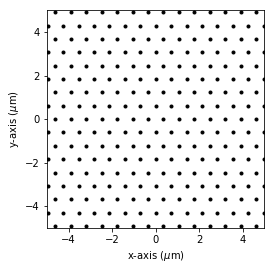

In [148]:
N = 50
Rsite = 15

nm = [[i - (N-1)/2, j - (N-1)/2] for i in range(N) for j in range(N)]
x_ol = Matrix([a1[0] * nm[i][0] + a2[0] * nm[i][1] for i in range(N*N)])
y_ol = Matrix([a1[1] * nm[i][0] + a2[1] * nm[i][1] for i in range(N*N)])

#x_ol.subs(k, 2 * pi / wavelength)
xs_tmp = np.array([v for v in x_ol.subs(k, 2 * pi/1.064)], dtype=np.float)
ys_tmp = np.array([v for v in y_ol.subs(k, 2 * pi/1.064)], dtype=np.float)
xs = xs_tmp[xs_tmp**2 + ys_tmp**2 < Rsite**2]
ys = ys_tmp[xs_tmp**2 + ys_tmp**2 < Rsite**2]

plt.plot(xs, ys, 'k.')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-5, 5]);
plt.ylim([-5, 5]);
plt.xlabel('x-axis ($\mu$m)');
plt.ylabel('y-axis ($\mu$m)');

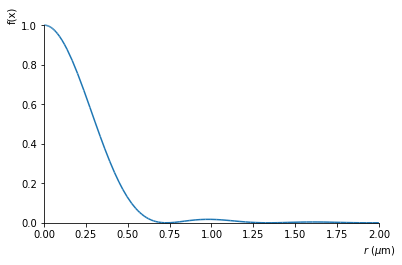

C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


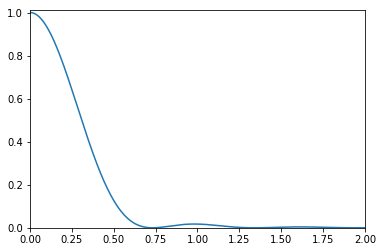

In [248]:
NA = 0.65
#NA = 0.55
k_calc = 2 * pi.evalf() / 0.780
alpha = float(k_calc * NA)
PSF = (2 * besselj(1, alpha * x) / (alpha * x))**2
sigma_PSF = 0.213 * 0.780 / NA

plot(PSF, (x, 0, 2), xlabel='$\mathit{r}$ ($\mu$m)');

N = 300
Magnification = 500 / 4
#Magnification = 750 / 4

#Magnification = 200

dpx = 16 / Magnification

XX, YY = np.meshgrid([(n - (N - 1)/2) * dpx for n in range(N)], [[(n - (N - 1)/2) * dpx for n in range(N)]])
RR = np.sqrt(XX**2 + YY**2)

r_psf = np.linspace(0, 2, 1001)
I_psf = PSF_calc(r_psf, alpha)
#I_psf = (2 * j1(float(alpha) * r_psf) / (alpha * r_psf))**2
#I_psf[r_psf==0] = 1

plt.plot(r_psf, I_psf)
plt.xlim([0, 2])
plt.ylim([0, 1.01])

Text(0.5,1,'125.00, 1.46520 um, 11.446875')

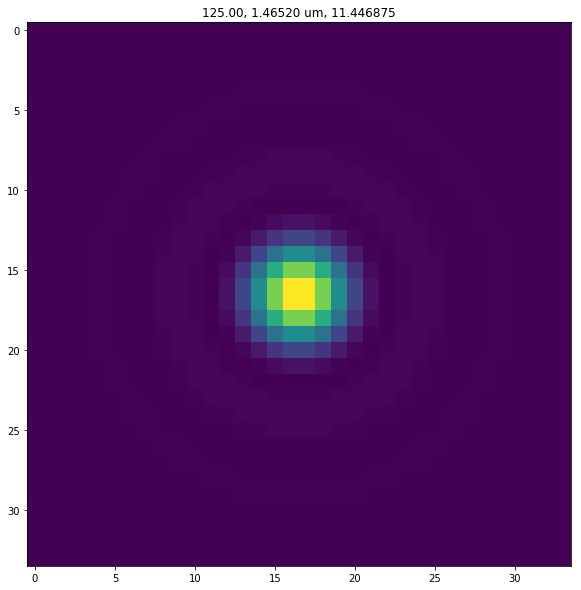

In [249]:
D_psf = 1.221 * 0.780 / NA
N_psf = int(D_psf * Magnification / 16 * 3)
XX_psf, YY_psf = np.meshgrid([(n - (N_psf - 1)/2) * dpx for n in range(N_psf)], [[(n - (N_psf - 1)/2) * dpx for n in range(N_psf)]])

RR_psf = np.sqrt((XX_psf)**2 + (YY_psf)**2)
ZZ_psf = PSF_calc(RR_psf, alpha)

plt.figure(figsize=[10, 10])
plt.imshow(ZZ_psf)
plt.title('%.2f, %.5f um, %f' % (Magnification, D_psf, D_psf * Magnification / 16))

In [266]:
seed(99)

N_loop = np.array(xs, dtype=np.float).size

A0 = rand(N_loop)
A0max = 2
A0[A0<=0.5] = 0
N_th = A0[A0>0.5].size
A0[A0>0.5] = A0max * (1 + 0.5 * (rand(N_th) - 0.5))
#A0[A0>0.5] = 1 + 0.4 * (rand(N_th) - 0.5)

ZZ_bg = A0max/10 * rand(ZZ.shape[0], ZZ.shape[1])

In [267]:
ZZ_gauss = np.zeros(RR.shape)
ZZ_psf = np.zeros(RR.shape)

for n in range(N_loop):
    RR = np.sqrt((XX - xs[n])**2 + (YY - ys[n])**2)
    ZZ_gauss += A0[n] * np.exp(-RR**2 / (2 * sigma_PSF**2))
    ZZ_psf += A0[n] * PSF_calc(RR, alpha)

ZZ_gauss += ZZ_bg
ZZ_psf += ZZ_bg

Text(0.5,1,'Airy funcion')

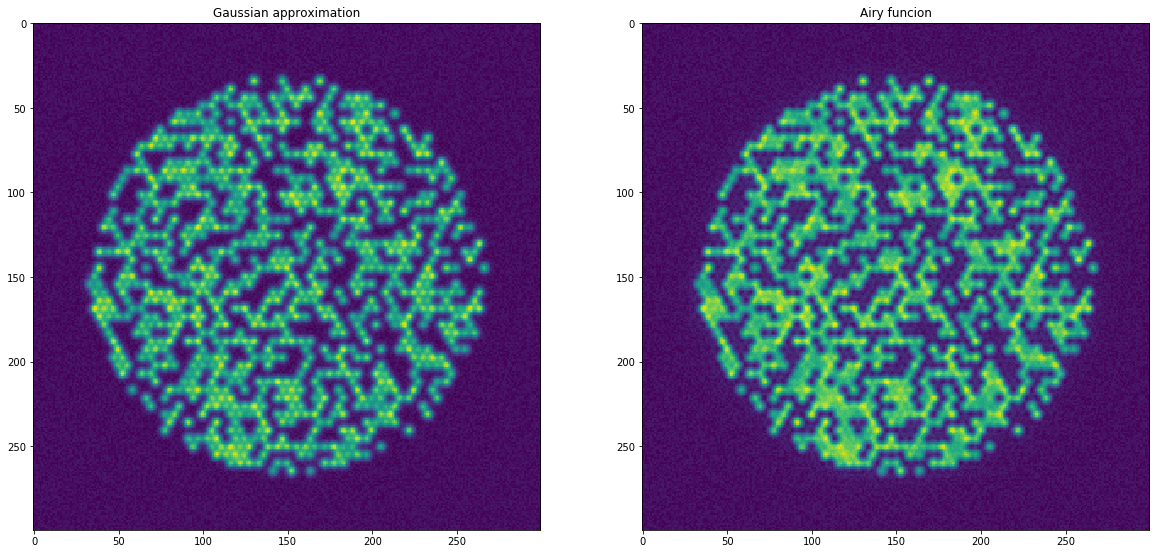

In [268]:
plt.figure(figsize=[20, 10])

plt.subplot(1, 2, 1)
plt.imshow(ZZ_gauss)
plt.title('Gaussian approximation')
#plt.xlim([0, 100]);
#plt.ylim([0, 100]);

plt.subplot(1, 2, 2)
plt.imshow(ZZ_psf)
plt.title('Airy funcion')
#plt.plot((np.max(XX) - xs) / dpx, (np.max(YY) - ys) / dpx, 'k.')
#plt.xlim([0, 100]);
#plt.ylim([0, 100]);

#plt.savefig('../img/test.pdf')

[1.04485591 0.         1.19078364 ... 1.16892255 1.00957785 0.        ]


(array([74700.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,  7201.,  7352.,  7361.,  7249.,  7215.,  7053.,
         7129.,  7302.,  7126.,  7231.,  7252.,  7229.]),
 array([0.        , 0.04166663, 0.08333325, 0.12499988, 0.16666651,
        0.20833313, 0.24999976, 0.29166638, 0.33333301, 0.37499964,
        0.41666626, 0.45833289, 0.49999952, 0.54166614, 0.58333277,
        0.62499939, 0.66666602, 0.70833265, 0.74999927, 0.7916659 ,
        0.83333253, 0.87499915, 0.91666578, 0.95833241, 0.99999903,
        1.04166566, 1.08333228, 1.12499891, 1.16666554, 1.20833216,
        1.24999879]),
 <a list of 30 Patch objects>)

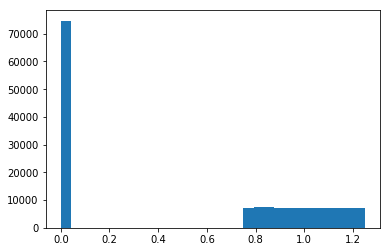

In [269]:
A0_hist = []

for n_seed in range(100):
    seed(n_seed)
    
    A0_tmp = rand(N_loop)
    A0max = 1
    A0_tmp[A0<=0.5] = 0
    A0[A0<=0.5] = A0[A0<=0.5] / 10
    N_th = A0[A0>0.5].size
    A0_tmp[A0>0.5] = A0max * (1 + 0.5 * (rand(N_th) - 0.5))
    
    A0_hist = np.append(A0_hist, A0_tmp)

print(A0_hist)

plt.hist(A0_hist, bins=30)

In [8]:
np.min(XX)

In [10]:
f = (2 * besselj(1, k_calc * NA * x) / (k_calc * NA * x))**2
g = (2 * besselj(1, k_calc * NA * sqrt(x**2 + y**2)) / (k_calc * NA * sqrt(x**2 + y**2)))**2

#plot(g, (x, 0, 2))

C:\Anaconda3\envs\py36\lib\site-packages\sympy\plotting\experimental_lambdify.py:165: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


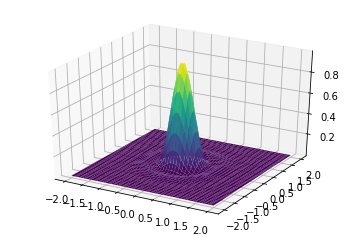

In [11]:
plot3d(g, (x, -2, 2), (y, -2, 2))  # 3d surface cartesian plot


---
逆格子ベクトルの計算 (基本格子ベクトルから)
\begin{eqnarray}
\boldsymbol{b}_1
= 2\pi \dfrac{\boldsymbol{a}_2 \times \boldsymbol{a}_3}{\boldsymbol{a}_1 \cdot (\boldsymbol{a}_2 \times \boldsymbol{a}_3)},
\boldsymbol{b}_2
= 2\pi \dfrac{\boldsymbol{a}_3 \times \boldsymbol{a}_1}{\boldsymbol{a}_1 \cdot (\boldsymbol{a}_2 \times \boldsymbol{a}_3)},
\boldsymbol{b}_3
= 2\pi \dfrac{\boldsymbol{a}_1 \times \boldsymbol{a}_2}{\boldsymbol{a}_1 \cdot (\boldsymbol{a}_2 \times \boldsymbol{a}_3)}
\end{eqnarray}

cf.) [キッテル 固体物理学入門 第8版](https://www.amazon.co.jp/%E3%82%AD%E3%83%83%E3%83%86%E3%83%AB-%E5%9B%BA%E4%BD%93%E7%89%A9%E7%90%86%E5%AD%A6%E5%85%A5%E9%96%80-%E7%AC%AC8%E7%89%88-%E3%83%8F%E3%83%BC%E3%83%88%E3%82%AB%E3%83%90%E3%83%BC%E7%89%88-%E3%83%81%E3%83%A3%E3%83%BC%E3%83%AB%E3%82%BA/dp/4621076566)

In [12]:
tmp = (transpose(a1) * Cross_vector(a2, a3))[0]
[2 * pi * Cross_vector(a2, a3) / tmp, 2 * pi * Cross_vector(a3, a1) / tmp, 2 * pi * Cross_vector(a1, a2) / tmp]

⎡⎡-3⋅k  ⎤  ⎡ 3⋅k  ⎤       ⎤
⎢⎢───── ⎥  ⎢ ───  ⎥  ⎡ 0 ⎤⎥
⎢⎢  2   ⎥  ⎢  2   ⎥  ⎢   ⎥⎥
⎢⎢      ⎥  ⎢      ⎥  ⎢ 0 ⎥⎥
⎢⎢-√3⋅k ⎥, ⎢-√3⋅k ⎥, ⎢   ⎥⎥
⎢⎢──────⎥  ⎢──────⎥  ⎢2⋅π⎥⎥
⎢⎢  2   ⎥  ⎢  2   ⎥  ⎢───⎥⎥
⎢⎢      ⎥  ⎢      ⎥  ⎣a_z⎦⎥
⎣⎣  0   ⎦  ⎣  0   ⎦       ⎦

----
### Unit cell 中のサイト数の比較
トラップ周波数の影響を考える上で 1 site に必要な面積, つまり Unit cell の面積は有用である.

ここで, Unit cell の体積は格子の基本並進ベクトル (primitive translation vector) $\boldsymbol{a}_i$ を用いて
$V=\boldsymbol{a}_1 \cdot (\boldsymbol{a}_2 \times \boldsymbol{a}_3)$
などと記述できる.

今, 2次元平面内の unit cell を考えており, この平面に対して直交する軸を 1 とすれば, 上記の式は unit cell の面積となる.

これより, 三角格子の unit cell の面積は
\begin{equation*}
S_{\mathbf{tri}} = \dfrac{2\sqrt{3}}{9}\lambda^2
\end{equation*}
となる.

一方, 正方格子の場合は
\begin{equation*}
S_{\mathbf{sq}} = \dfrac{1}{4}\lambda^2
\end{equation*}
となる.

いずれの場合もこの unit cell の面積中にサイトは 1つのみであるから, 三角格子を正方格子の場合と同一波長で構築した際に単位面積当たりのサイト数を比較すると,
\begin{eqnarray*}
\dfrac{1/S_{\mathbf{tri}}}{1/S_{\mathbf{sq}}}
&=& \dfrac{3\sqrt{3}}{8} \sim 0.65
\end{eqnarray*}
となる.

従って, この点からは三角格子の場合は正方格子の場合と比較して, トラップ周波数を小さくする必要がある.

しかし, 一方で隣接サイト数が正方格子の場合 4つであるのに対して, 三角格子は隣接サイト数が 6つである.

これにより Mott 状態への遷移が U/(zJ) ~ 5.8 

In [13]:
tmp_tri = (transpose(a1) * Cross_vector(a2, a3))[0]
Stri = tmp_tri.subs({k: 2*pi/wavelength, az: 1})

aa1 = Matrix([1, 0, 0]) * 2 * pi / (2 * k)
aa2 = Matrix([0, 1, 0]) * 2 * pi / (2 * k)

tmp_sq = (transpose(aa1) * Cross_vector(aa2, a3))[0]
Ssq = tmp_sq.subs({k: 2 * pi/wavelength, az: 1})

Ssq/Stri

------
以下：雑多な計算

In [14]:
80*0.65